## NLP PROJECT: Text Classification of Subreddit Food topics into 3 classes, Japanese, Chinese or Mexican based on historical post titles and comments using Natural Language Processing.

<img src="Images/WordCloud-Black.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

## Problem Statement:
+ A marketing team for a food based startup company wants a model to easily classify their email inquiries from customers, plus get some insights on top keywords and topics that people online are actively discussing about and further craft their online content and improve on their SEO.

## Executive Summary:
+ NLP is a pre-processing step that helps convert human interpretable language content into machine readable format. Later we can build ML models in order for computer to interpret the preprocessed content and make useful predictions or inferences to accomplish or goals. 

+ Some uses of NLP include Email Filter, Predictive Text, Language Translation, Smart Assistants (bots) to name a few. [Read more][1].

+ For this project, i'll build a classifying model that can help categorize all food enquiries from our client, to demonstrate this I will use data from popular news aggregation, web content rating, and discussion website www.Reddit.com  [Japanese Food][2], [Chinese Food][3], [Mexican Food][4]. 

+ Using PushShift API, i'll fetch data from all 3 subreddits(titles,Comments etc), Clean and explore data using Pandas library, preprocess content using NLP libraries like BeautifulSoup, NLTK and Sklean, build several ML models to obtain best classification accuracy. Lastly, compare using visualizations and evaluation metrics like ConfusionMatrix, ClassificationReport, AUC score etc.







[1]: "https://www.tableau.com/learn/articles/natural-language-processing-examples"
[2]: "https://www.reddit.com/r/JapaneseFood/"
[3]: "https://www.reddit.com/r/chinesefood/"
[4]: "https://www.reddit.com/r/mexicanfood/"

## Contents:

+ [Import Data and Export as .csv - separate file](SamayShah_Project3_DataCleaning.ipynb)
+ [Data Cleaning](#Data-Cleaning)
+ [EDA / Preprocess](#EDA-and-Pre-process)
+ [Model-1 Logistic Regression](#Model-1-Classifier:-Logistic-Regression,-Vectorizer:-Tfidf)
+ [Model-2 Tree Based - Random Forest](#Model-2-Classifier:-Random-Forest,-Vectorizer:-CountVectorizer)
+ [Model-3 Tree Based - Ada Boost](#Model-3-Classifier:-AdaBoostClassifier)
+ [Model-4 Naive Bayes - Multinomial](#Model-4-Classifier:-Multinomial-Naive-Bayes,-Vectorizer:-CountVectorizer)
+ [Model-5 SVM - Support Vector Classifier](#Model-5-Classifier:-SVM-(Support-Vector-Clssifier),-Vectorizer:-CountVectorizer)
+ [Model Comparison](#Comparing-scores-for-all-Models)
+ [Recommendations](#Insights)
+ [What Else!](#Scope-of-this-project)

[1]: ""
[2]: ""
[3]: ""
[4]: ""
[5]: ""
[6]: ""
[7]: ""
[8]: ""
[9]: "
[10]: ""
[11]: ""


In [1]:
## Import Libraries

## Preprocessing
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup       
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


## Build Models
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# Tokenize input variables using sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer


## Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
### Import all .csv files

## Final - Train Data
jap_train = pd.read_csv('FoodData/jap_train.csv')
chi_train = pd.read_csv('FoodData/chi_train.csv')
mex_train = pd.read_csv('FoodData/mex_train.csv')


## Final - Test Data
jap_test = pd.read_csv('FoodData/jap_test.csv')
chi_test = pd.read_csv('FoodData/chi_test.csv')
mex_test = pd.read_csv('FoodData/mex_test.csv')

## Data Cleaning

In [3]:
## Combined into 1 file

df_train = pd.concat([jap_train,chi_train,mex_train])
df_test = pd.concat([jap_test,chi_test,mex_test])

In [4]:
## Check for any null/misisng-values

df_train.loc[df_train['title'].isnull() == True,'title']

Series([], Name: title, dtype: object)

In [5]:
## Replace any null values with stopword = 'a'

df_train.loc[df_train['title'].isnull() == True,'title'] = 'a'
df_test.loc[df_test['title'].isnull() == True,'title'] = 'a'

## EDA and Pre-process

**Remove HTML, Punctions, filter titles using Regular Expressions, remove any stopwords, join whats remaining and tokenize**

In [6]:
## set our input and output variables (vector X for use in CountVectorizer)

X = df_train[['title']]
y = df_train['label']

In [7]:
## Baseline Accuracy

y.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: label, dtype: float64

In [8]:
# Split the data into the training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.40,
                                                    stratify=y,
                                                    random_state=42)

In [9]:
## Function from DSI class notes,

def titles_to_words(raw_titles):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_titles).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z\u4e00-\u9fff]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stop words.
    meaningful_words = [w for w in words if w not in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [10]:
# Get the number of reviews based on the dataframe size.
total_titles = X.shape[0]
print(f'There are {total_titles} titles.')

There are 24000 titles.


In [11]:
X_train.columns

Index(['title'], dtype='object')

In [12]:
# Initialize an empty list to hold the clean reviews.
clean_train_titles = []
clean_test_titles = []

print("Cleaning and parsing the training set subreddit titles...")

j = 0
for train_title in X_train['title']:
    # Convert review to words, then append to clean_train_reviews.
    clean_train_titles.append(titles_to_words(train_title))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 1000 == 0:
        print(f'Title {j + 1} of {total_titles}.')
    
    j += 1

# Let's do the same for our testing set.

print("Cleaning and parsing the testing set subreddit titles...")

for test_title in X_test['title']:
    # Convert review to words, then append to clean_train_reviews.
    clean_test_titles.append(titles_to_words(test_title))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 1000 == 0:
        print(f'Title {j + 1} of {total_titles}.')
        
    j += 1

Cleaning and parsing the training set subreddit titles...


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.chinasichuanfood.com/custard-bun-milk-yolk-buns/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.justonecookbook.com/taiyaki/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://youtu.be/Knw6pDVM_WI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document

Title 1000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.pressurecookrecipes.com/instant-pot-chinese-beef-stew/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 2000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:332: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://en.m.wikipedia.org/wiki/Crispy_fried_chicken" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 3000 of 24000.
Title 4000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.koransha.co.jp/koransha/koransha_english.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 5000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://filmi-beats.blogspot.com/2020/08/Mouni-Roy.html?m=1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 6000 of 24000.
Title 7000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://en.wikipedia.org/wiki/Rushan_cheese

https://en.wikipedia.org/wiki/Rubing" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=hdvgyKGEZFw" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 8000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.seriouseats.com/recipes/2016/06/ponzu-sauce-recipe.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 9000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://youtu.be/LzOeptNhdY0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 10000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://m.yamibuy.com/en/p/liupo-spicy-hot-pot-soup-base-580g/1021008361?utm_source=google&amp;utm_medium=cpc&amp;utm_campaign=grocery_en&amp;gclid=CjwKCAiAo5qABhBdEiwAOtGmbqmfoj-ELbmPLi_MtxE1KX7u9ybzItlt2xg8sGNg1s94NVEdYSa64RoC3uQQAvD_BwE" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 11000 of 24000.
Title 12000 of 24000.
Title 13000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "http://bit.ly/yoquierolograrmiobjectivo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 14000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://youtu.be/vmck2ek5PuY" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Cleaning and parsing the testing set subreddit titles...


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.foodnetwork.com/recipes/alton-brown/alton-browns-buffalo-wings-recipe-1972721" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.google.com/search?q=%E3%81%8D%E3%82%85%E3%81%86%E3%82%8A%E3%81%AE%E3%82%AD%E3%83%A5%E3%83%BC%E3%81%A1%E3%82%83%E3%82%93&amp;tbm=isch" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 15000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/c/ShowaRecipesChannel" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 16000 of 24000.
Title 17000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "http://imgur.com/gallery/rVlJZ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 18000 of 24000.
Title 19000 of 24000.
Title 20000 of 24000.
Title 21000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.justonecookbook.com/nikuman-steamed-pork-buns/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.isabeleats.com/cilantro-lime-rice/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://youtu.be/1zr_ZRPmVxI

https://youtu.be/Omu7ZCfsqMo

https://youtu.be/r3ZlCwn9io4

https://youtu.be/r6Lz-FfuM7s

https://youtu.be/VLxl1UeuwHY

http

Title 22000 of 24000.


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.justonecookbook.com/hamburger-steak-hambagu/#" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=2Z8voA65sD8" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Title 23000 of 24000.
Title 24000 of 24000.


In [13]:
clean_train_titles

['made somen noodles spicy mushroom tomato soup',
 'great lunch guest make fish get recipe',
 'reviewing sour spicy noodles suan la fen',
 'want make home anyone know main spices types bbq',
 'vegan tofu katsu curry perfect cold autumn days',
 'carne asada easter bbq',
 'first time making nuomiji home successful',
 'recipe using kind soy sauce',
 'braised beef ribs salsa macha buttermilk grits',
 'ichigo daifuku mochis',
 'thanks recipe wait make',
 'esto es lo que hace de xico un para',
 'miso ramen',
 'wondering escamoles come',
 'steamed whole grouper 清蒸石斑魚',
 'made xaicanfai 下饭菜 rice topping tonight fried ground pork doubangjiang 豆瓣酱 ginger topped steamed beans xaicanfai like',
 'yum',
 'like salmon onigiri',
 'maccha shiroan filled wagashi recent visit nihon teien daisen park sakai',
 'dishes prefer tortilla cutlery bread enjoy bread picadillo aaaand think anything else surely couple dishes',
 'uff qu pinche delicia se perfecta',
 'puffed bloomed hominy boil consumption nixtamal c

In [14]:
my_stopwords = ['food','made','like','de','make','good','one','https','looks','first','delicious','know','com','con','add','making','use','best','would','get','also','try','cooking','really','dish','much','great','thanks','think','find','recipes','thank','cook','style','new','used','home','www','need','anyone','well','love','red','green','want','en','go','int64','la','white']

In [15]:
vectorizer01 = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = my_stopwords,  ##Additional stop words
                             max_features = 5000) 

train_data_features = vectorizer01.fit_transform(clean_train_titles)

test_data_features = vectorizer01.transform(clean_test_titles)

##shape
print(train_data_features.shape)
print(test_data_features.shape)
print(type(train_data_features)) ## Sparse Matrix

(14400, 5000)
(9600, 5000)
<class 'scipy.sparse.csr.csr_matrix'>


In [16]:
vocab = vectorizer01.get_feature_names()
#print(len(vocab))
#print(vocab,end="")

In [17]:
words = pd.DataFrame(train_data_features.todense(), columns=vocab)

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


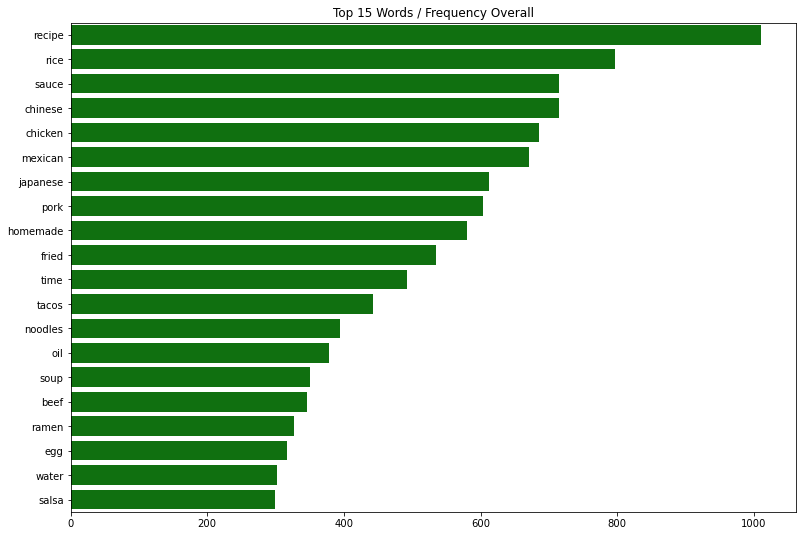

In [18]:
import seaborn as sns

top15 = words.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(13,9))
sns.set_color_codes("pastel")
sns.barplot(top15.values,top15.index, 
            label="Total", color="green",orient='h')
plt.title("Top 15 Words / Frequency Overall");
plt.savefig('top15.jpeg')

In [19]:
from wordcloud import WordCloud

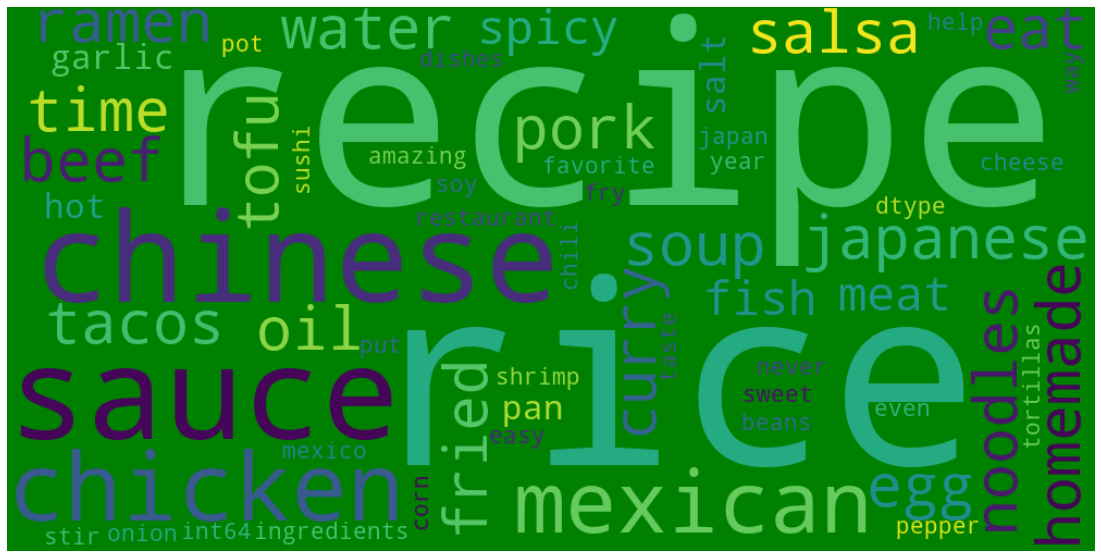

<Figure size 432x288 with 0 Axes>

In [20]:
# Start with one review:
text = words.sum().sort_values(ascending=False).head(60)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="Green",width=1000,height=500).generate(str(text))

# Display the generated image:
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();
plt.savefig('aaa.jpeg');

## Model-1 Classifier: Logistic Regression, Vectorizer: Tfidf

In [21]:
X = list(df_train['title'])
y = list(df_train['label'])

In [22]:
# Split the data into the training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.40,
                                                    stratify=y,
                                                    random_state=42)

In [23]:
my_stopwords1 = ['food','made','like','de','make','good','one','https','looks','first','delicious','know','com','con','add','making','use','best','would','get','also','try','cooking','really','dish','much','great','thanks','think','find','recipes','thank','cook','style','new','used','home','www','need','anyone','well','love','red','green','want','en','go','int64','la','white']

In [24]:
 pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr',LogisticRegression())

])


pipe_params2 = {
    'tfidf__max_features' : [1400],
    'tfidf__min_df': [2],
    'tfidf__max_df': [0.99],
    'tfidf__ngram_range' : [(1,1),(1,2)], ## maximum and minimum 1gram
   #'tfidf__stop_words':['english'],
    'lr__penalty': ['l1'],
   'lr__solver' : ['liblinear'],
}

# Instantiate GridSearchCV.

gs2 = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid=pipe_params2, # what parameters values are we searching?
                  cv=5,
                verbose=1) # 3-fold cross-validation.

gs2.fit(X_train, y_train)

# Fit model.

print('Best Params: ',gs2.best_params_)
print('Best Estimator Score Train: ', gs2.score(X_train, y_train))
print('Best Estimator Score Test: ', gs2.score(X_test, y_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.3s finished


Best Params:  {'lr__penalty': 'l1', 'lr__solver': 'liblinear', 'tfidf__max_df': 0.99, 'tfidf__max_features': 1400, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}
Best Estimator Score Train:  0.8031944444444444
Best Estimator Score Test:  0.761875


**Recreate Logistic Regression using best parameters from above for feature importance**

In [25]:
tfidf1 = TfidfVectorizer(max_features=1400,min_df=2,max_df=0.99,ngram_range=(1,1))
df1 = pd.DataFrame(tfidf1.fit_transform(X_train).toarray(),
                  columns=tfidf1.get_feature_names())

In [26]:
X_train_log = tfidf1.fit_transform(X_train)
X_test_log = tfidf1.transform(X_test)

### Test for KNN
### ss = StandardScaler(with_mean=False)
### X_train_sc = ss.fit_transform(X_train_log)
### X_test_sc = ss.transform(X_test_log)
### knn=KNeighborsClassifier(n_neighbors=12)
### cross_val_score(knn,X_train_sc,y_train, cv=5).mean()

In [27]:
# Instantiate logistic regression.
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Fit logistic regression.
lr.fit(X_train_log, y_train)

# Evaluate logistic regression.
print(f'Training Score: {lr.score(X_train_log, y_train)}')
print(f'Testing Score: {lr.score(X_test_log, y_test)}')

Training Score: 0.8031944444444444
Testing Score: 0.761875


In [28]:
cross_val_score(lr,X_train_log,y_train,cv=5).mean()

0.7560416666666667

In [29]:
## Test Coefficients for Logistic
coef_dict = dict(zip(tfidf1.get_feature_names(), lr.coef_))
coef_dict

{'01': array([ 0.        ,  0.        ,  0.33450038, ..., -1.41706552,
         0.        ,  0.        ]),
 '10': array([ 0.12657338,  0.        ,  0.        , ..., -1.6987394 ,
         0.56964843,  1.24965472]),
 '100': array([ 0.        ,  0.        ,  0.        , ...,  4.4902821 ,
        -0.15107666, -1.44353917])}

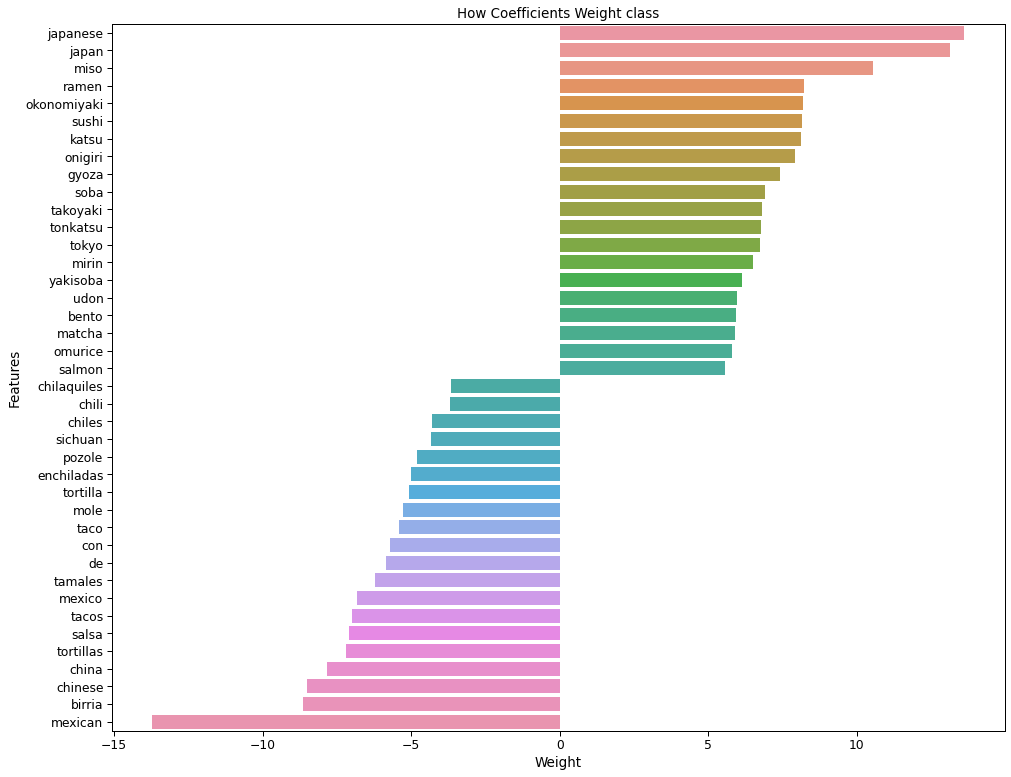

In [30]:

## Get All Features Names plus their Feature Importance
features1 = tfidf1.get_feature_names()
importance1 = lr.coef_[0]

## Create a Dictionary with top features
top_features1 = {}
for i in range(len(importance1)):
    top_features1[features1[i]] = importance1[i]

## Create a Dataframe for the same, transpose and reset index
Features_list_01 = pd.DataFrame([top_features1]).T.sort_values(by=[0], ascending=False).reset_index().rename(columns={'index':'Features',0:'Importance'})

## Create new dataframe consisting of only the top and bottom scores
top_features = pd.DataFrame()
top_features['Features'] = Features_list_01['Features'].head(20)
top_features['Weight'] = Features_list_01['Importance'].head(20)
bottom_features = pd.DataFrame()
bottom_features['Features'] = Features_list_01['Features'].tail(20)
bottom_features['Weight'] = Features_list_01['Importance'].tail(20)

## Combine Top+Bottom Features into 1 dataframe
top_bottom = pd.concat([top_features,bottom_features])
plt.figure(figsize=(16,13))
sns.set_context("paper", font_scale=1.4) 
sns.barplot(data=top_bottom, y='Features', x='Weight',orient='h')
plt.title('How Coefficients Weight class');
plt.savefig('coefficients_logistic_top40.jpeg')

In [31]:
pd.DataFrame(coef_dict['01'])

,0
0,0.000000
1,0.000000
2,0.334500
3,0.000000
4,0.000000
...,...
1395,0.000000
1396,0.000000
1397,-1.417066
1398,0.000000


**Absence of Chinese words, potential reasons,**
+ People tend to write key words in Mandarin.
+ Different writing a lot of typing mistakes and hence the 'Mandarin' features were not chosen among to 1400 features that I'm using for this model.

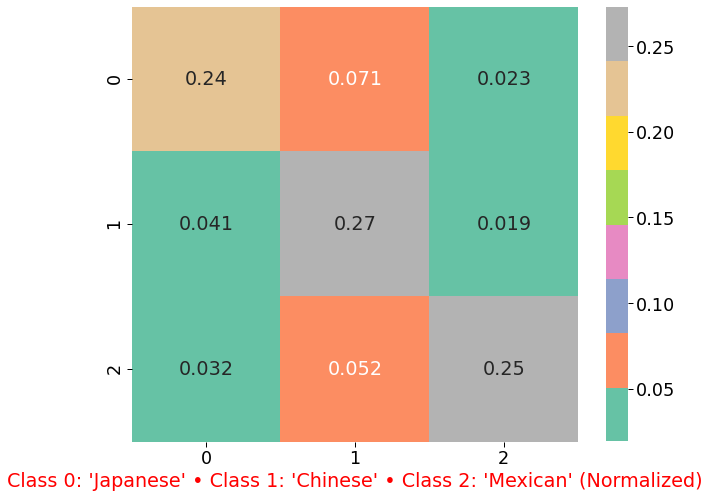

In [32]:
ypred1 = lr.predict(X_test_log)
result1 = pd.DataFrame(ypred1, columns=['Pred'])
result1['y_test'] = y_test
cf1 = confusion_matrix(y_test,ypred1)
plt.figure(figsize=(10,8))
sns.set_context("paper", font_scale=2.0) 
sns.heatmap(cf1/np.sum(cf1),annot=True, cmap='Set2')
plt.xlabel("Class 0: 'Japanese' • Class 1: 'Chinese' • Class 2: 'Mexican' (Normalized)", c='red');
plt.savefig('Heatmap_LogisticRegression.jpeg')

## The Diagonal tells me that over 76% of the classes have been classified correctly. 

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


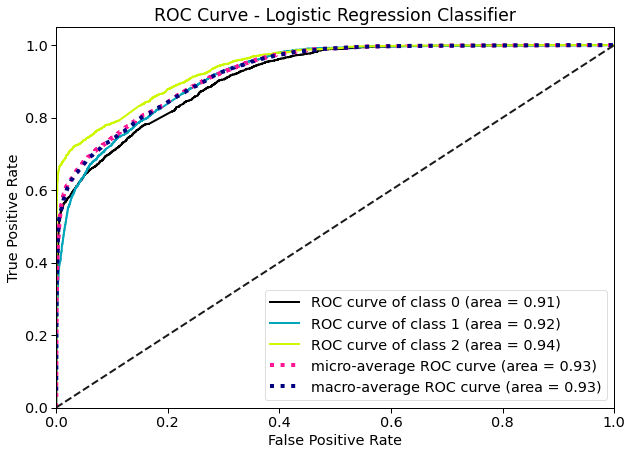

<Figure size 432x288 with 0 Axes>

In [33]:
import scikitplot as skplt #to make things easy
sns.set_context("paper", font_scale=1.5)
y_pred_proba = lr.predict_proba(X_test_log)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba,figsize=(10,7), title='ROC Curve - Logistic Regression Classifier' )
plt.show();
plt.savefig('ROC_Curve_LogisticRegression');

[Reference for below code - adopted from Scikit learn documentation][1]

[1]: "https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html"

In [34]:
### Calculate AUC (Area Under Curve) - using 'ovo' and 'ovr'

y_prob = lr.predict_proba(X_test_log)

## One Vs One - ovo
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")  ##Unweighted Average
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted") ## Weighted Average

## One Vs Rest - ovr
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

## Scores are similar because classes were balanced

One-vs-One ROC AUC scores:
0.925981 (macro),
0.925981 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.925981 (macro),
0.925981 (weighted by prevalence)


In [35]:
#Features_list_01[500:550]

## Model-2 Classifier: Random Forest, Vectorizer: CountVectorizer

In [36]:
X = list(df_train['title'])
y = list(df_train['label'])

In [37]:
# Split the data into the training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.40,
                                                    stratify=y,
                                                    random_state=42)

In [38]:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rfc',RandomForestClassifier(random_state=42))
])


pipe_params3 = {
    'cvec__max_features' : [1500],
    'cvec__min_df': [3],
    'cvec__max_df': [0.8],
    'cvec__ngram_range' : [(1,1)], ## maximum and minimum 1gram
    #'cvec__stop_words' : ['english'],
    #'rfc__max_depth': [20,40],
    #'rfc__n_estimators': [10]
   'rfc__criterion': ['gini','entropy'],
    'rfc__max_depth':[15]
}

# Instantiate GridSearchCV.

gs3 = GridSearchCV(pipe3,param_grid=pipe_params3,cv=5,verbose=1,n_jobs=-1) # Uses all cores

gs3 = gs3.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.8s finished


In [39]:
#cross_val_score(gs3,X_train,y_train).mean()

In [40]:
print('Best Params: ',gs3.best_params_)
print('Best Estimator Score Train: ', gs3.score(X_train, y_train))
print('Best Estimator Score Test: ', gs3.score(X_test, y_test))

Best Params:  {'cvec__max_df': 0.8, 'cvec__max_features': 1500, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'rfc__criterion': 'entropy', 'rfc__max_depth': 15}
Best Estimator Score Train:  0.7188888888888889
Best Estimator Score Test:  0.7114583333333333


**Recreate RandomForest Classification using best parameters from above for feature importance**

In [41]:
rfc2 = RandomForestClassifier(random_state=42,max_depth=15)

In [42]:
## Vectorize
cvec2 = CountVectorizer(max_features=1500,min_df=3,max_df=0.99,ngram_range=(1,1))

## Sparse Matrix -> Dense Matrix
df1 = pd.DataFrame(cvec2.fit_transform(X_train).toarray(),
                  columns=cvec2.get_feature_names())

## Transform
X_train_log = cvec2.fit_transform(X_train)
X_test_log = cvec2.transform(X_test)

In [43]:
cross_val_score(rfc2,X_train_log,y_train,cv=5).mean()

0.703125

In [44]:
##Fit
rfc2.fit(X_train_log,y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [45]:
print(rfc2.score(X_train_log,y_train))
print(rfc2.score(X_test_log,y_test))

0.7199305555555555
0.7108333333333333


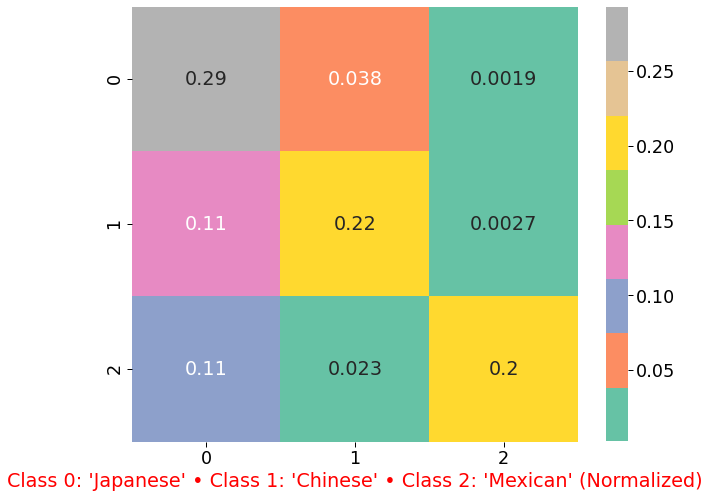

In [46]:
ypred2 = rfc2.predict(X_test_log)
result2 = pd.DataFrame(ypred2, columns=['Pred'])
result2['y_test'] = y_test
cf2 = confusion_matrix(y_test,ypred2)
plt.figure(figsize=(10,8))
sns.set_context("paper", font_scale=2.0) 
sns.heatmap(cf2/np.sum(cf2),annot=True, cmap='Set2')
plt.xlabel("Class 0: 'Japanese' • Class 1: 'Chinese' • Class 2: 'Mexican' (Normalized)", c='red');
plt.savefig('Heatmap_RandomForest.jpeg')

## The Diagonal tells me that over 70% of the classes have been classified correctly. 

In [47]:
## Classification Report
print(classification_report(y_test,ypred2))



              precision    recall  f1-score   support

           0       0.57      0.88      0.69      3200
           1       0.78      0.65      0.71      3200
           2       0.98      0.60      0.75      3200

    accuracy                           0.71      9600
   macro avg       0.77      0.71      0.71      9600
weighted avg       0.77      0.71      0.71      9600



In [48]:
### Calculate AUC (Area Under Curve) - using 'ovo' and 'ovr'

y_prob = rfc2.predict_proba(X_test_log)

## One Vs One - ovo
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")  ##Unweighted Average
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted") ## Weighted Average

## One Vs Rest - ovr
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

## Scores are similar because classes were balanced
## Classes are less separated compared to Logistic Regression

One-vs-One ROC AUC scores:
0.899736 (macro),
0.899736 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.899736 (macro),
0.899736 (weighted by prevalence)


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


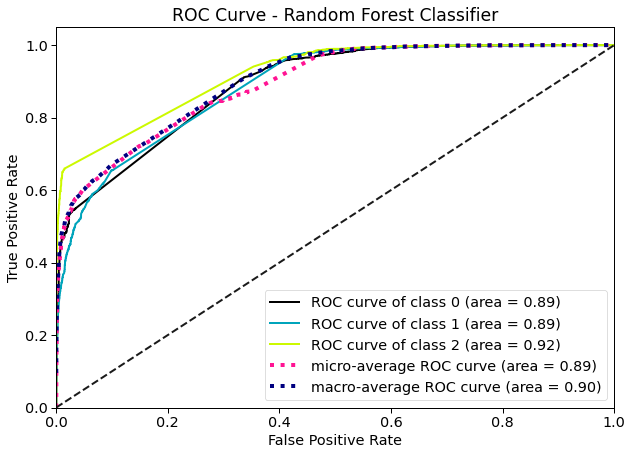

<Figure size 432x288 with 0 Axes>

In [49]:
import scikitplot as skplt #to make things easy
sns.set_context("paper", font_scale=1.5)
y_pred_proba = rfc2.predict_proba(X_test_log)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba,figsize=(10,7), title = 'ROC Curve - Random Forest Classifier' )
plt.show();
plt.savefig('ROC_Curve_RandomForest.jpeg');

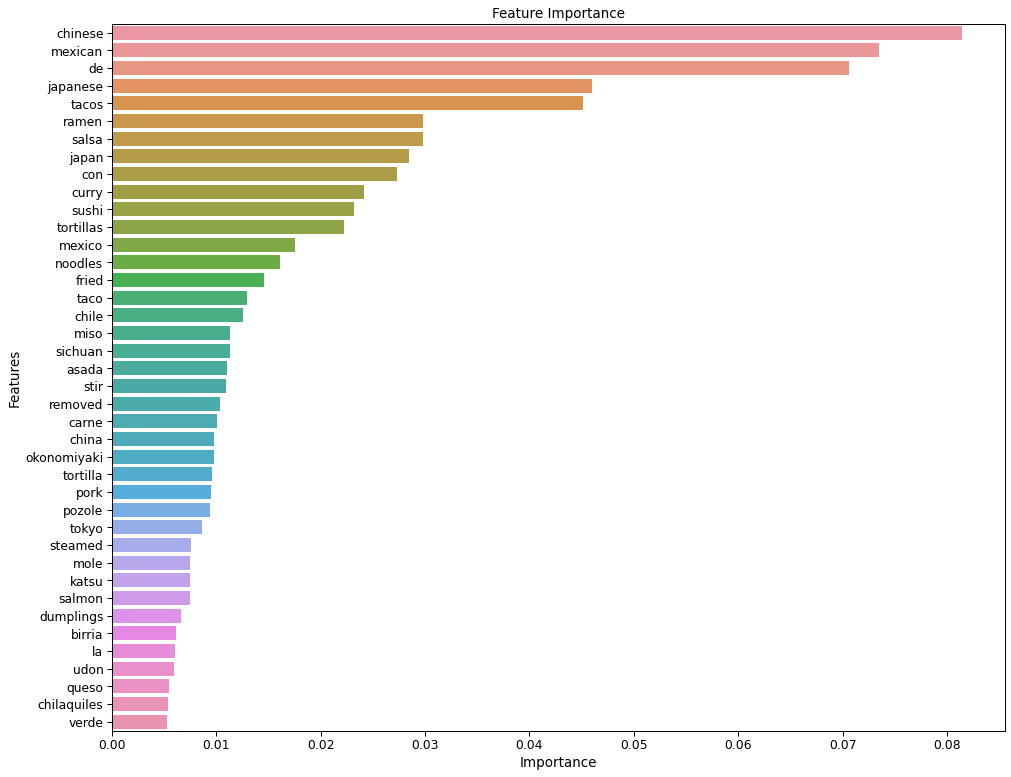

In [50]:

## Get All Features Names plus their Feature Importance
features2 = cvec2.get_feature_names()
importance2 = rfc2.feature_importances_

## Create a Dictionary with top features
top_features2 = {}
for i in range(len(importance2)):
    top_features2[features2[i]] = importance2[i]

## Create a Dataframe for the same, transpose and reset index
Features_list_02 = pd.DataFrame([top_features2]).T.sort_values(by=[0], ascending=False).reset_index().rename(columns={'index':'Features',0:'Importance'})

## Create new dataframe consisting of only the top and bottom scores
top_features = pd.DataFrame()
top_features['Features'] = Features_list_02['Features'].head(20)
top_features['Importance'] = Features_list_02['Importance'].head(20)
bottom_features = pd.DataFrame()
bottom_features['Features'] = Features_list_02['Features'].tail(20)
bottom_features['Importance'] = Features_list_02['Importance'].tail(20)

## Combine Top+Bottom Features into 1 dataframe
top_bottom = pd.concat([top_features,bottom_features])
plt.figure(figsize=(16,13))
sns.set_context("paper", font_scale=1.4) 
sns.barplot(data=Features_list_02[:40], y='Features', x='Importance',orient='h')
plt.title('Feature Importance');
plt.savefig('feature_importance_RandomForest_top40.jpeg')

In [51]:
#Features_list_02.head(40)

## Model-3 Classifier: AdaBoostClassifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
X = list(df_train['title'])
y = list(df_train['label'])

In [57]:
my_stopwords4 = set(['herself', 'forty', 'one', 'became', 'whereafter', 'mill', 'ever', 'whole', 'please', 'never', 'therefore', 'two', 'somehow', 'take', 'again', 'give', 'interest', 'be', 'amount', 'sometime', 'is', 'elsewhere', 'four', 'cant', 'them', 'noone', 'done', 'its', 'been', 'thick', 'for', 'would', 'do', 'nobody', 'to', 'what', 'system', 'whereupon', 'within', 'hundred', 'they', 'already', 'by', 'few', 'therein', 'thin', 'alone', 'beforehand', 'wherein', 'anyone', 'thereafter', 'of', 'move', 'whereby', 'where', 'once', 'that', 'everything', 'seem', 'toward', 'out', 'who', 'whom', 'why', 'less', 'de', 'if', 'were', 'up', 'however', 'there', 'ourselves', 'above', 'except', 'then', 'nothing', 'thru', 'nine', 'herein', 'nowhere', 'inc', 'together', 'perhaps', 'such', 'yourself', 'describe', 'further', 'serious', 'call', 'ten', 'under', 'down', 'cannot', 'my', 'might', 'empty', 'throughout', 'with', 'am', 'each', 'co', 'wherever', 'keep', 'around', 'thus', 'else', 'very', 'cry', 'about', 'any', 'indeed', 'much', 'latter', 'on', 'always', 'while', 'because', 'three', 'in', 'over', 'detail', 'whence', 'yourselves', 'whenever', 'enough', 'until', 'formerly', 'bottom', 'well', 'ours', 'have', 'himself', 'ie', 'anywhere', 'during', 'via', 'ltd', 'myself', 'afterwards', 'almost', 'hereafter', 'next', 'all', 'we', 'mostly', 'many', 'mine', 'nevertheless', 'this', 'these', 'top', 'before', 'most', 'couldnt', 'hasnt', 'a', 'his', 'below', 'back', 'meanwhile', 'can', 'made', 'per', 'fire', 'first', 'after', 'him', 'front', 'here', 'at', 'whereas', 'no', 'than', 'off', 'amoungst', 'otherwise', 'namely', 'last', 'other', 'against', 'as', 'your', 'show', 'becomes', 'least', 'twenty', 'was', 'should', 'or', 'former', 'whether', 'will', 'but', 'un', 'our', 'those', 'us', 'some', 'thence', 'nor', 'five', 'more', 'still', 'has', 'whither', 'moreover', 'you', 'when', 'besides', 'third', 'part', 'being', 'too', 'he', 'latterly', 'twelve', 'anyhow', 'may', 'me', 'now', 'name', 'hers', 'someone', 'though', 'none', 'since', 'also', 'fifty', 'are', 'into', 'through', 'their', 'either', 'neither', 'everyone', 'must', 're', 'becoming', 'beside', 'itself', 'go', 'eleven', 'upon', 'rather', 'bill', 'sincere', 'along', 'beyond', 'see', 'side', 'could', 'only', 'sometimes', 'both', 'although', 'thereby', 'fifteen', 'often', 'from', 'thereupon', 'she', 'behind', 'fill', 'eight', 'seems', 'it', 'the', 'how', 'others', 'yours', 'amongst', 'con', 'which', 'full', 'and', 'i', 'put', 'towards', 'even', 'whose', 'seemed', 'anything', 'without', 'onto', 'whatever', 'something', 'whoever', 'become', 'among', 'eg', 'had', 'everywhere', 'hereupon', 'found', 'somewhere', 'so', 'an', 'etc', 'between', 'every', 'same', 'seeming', 'across', 'six', 'anyway', 'due', 'get', 'several', 'themselves', 'another', 'hence', 'hereby', 'sixty', 'find', 'own', 'her', 'yet', 'not','food','made','like','de','make','good','one','https','looks','first','delicious','know','com','con','add','making','use','best','would','get','also','try','cooking','really','dish','much','great','thanks','think','find','recipes','thank','cook','style','new','used','home','www','need','anyone','well','love','red','green','want','en','go','int64','la','white','like','make','recipe','just','looks','making','sauce','make','https','just','looks','good','add','don','amp','removed','time','ve'])

In [58]:
# Split the data into the training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.40,
                                                    stratify=y,
                                                    random_state=42)

In [59]:
cvec_ada = CountVectorizer(max_features=1400,max_df=0.5,ngram_range=(1,1),stop_words=my_stopwords4)

## Sparse Matrix -> Dense Matrix (For Visual Ref)
df3 = pd.DataFrame(cvec_ada.fit_transform(X_train).toarray(),
                  columns=cvec_ada.get_feature_names())

## Transform
X_train_log = cvec_ada.fit_transform(X_train)
X_test_log = cvec_ada.transform(X_test)

In [60]:
ada = AdaBoostClassifier()
ada.fit(X_train_log,y_train)
ada.score(X_test_log,y_test)

0.6146875

In [61]:
ada_param = {
    'n_estimators':[50,100],
    'base_estimator__max_depth': [1,2,3]  ## DOUBLE underscore to access max_depth parameter
    
}

gs3 = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),),
                 param_grid=ada_param, cv=5, verbose=1)

gs3.fit(X_train_log,y_train)
best_model = gs3.best_estimator_
print(best_model.score(X_train_log,y_train))
print(best_model.score(X_test_log,y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   27.2s finished


0.7683333333333333
0.7336458333333333


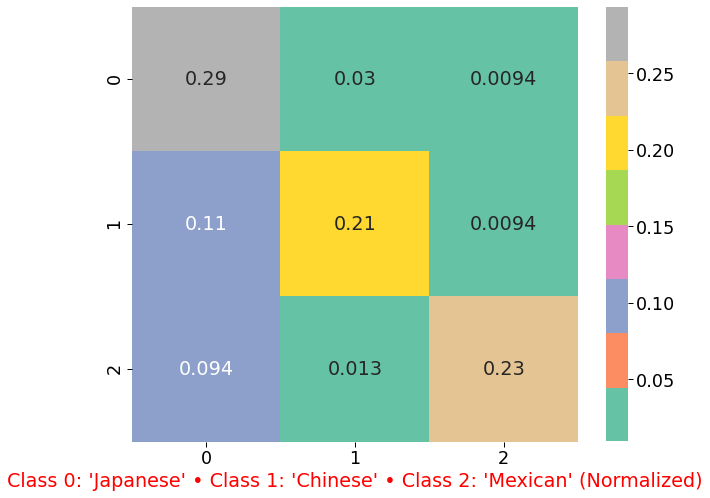

In [62]:
ypred3 = gs3.predict(X_test_log)
result3 = pd.DataFrame(ypred3, columns=['Pred'])
result3['y_test'] = y_test
cf3 = confusion_matrix(y_test,ypred3)
plt.figure(figsize=(10,8))
sns.set_context("paper", font_scale=2.0) 
sns.heatmap(cf3/np.sum(cf3),annot=True, cmap='Set2')
plt.xlabel("Class 0: 'Japanese' • Class 1: 'Chinese' • Class 2: 'Mexican' (Normalized)", c='red');
#plt.savefig('Heatmap_AdaBoost.jpeg')

## The Diagonal tells me that over 75% of the classes have been classified correctly. 

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


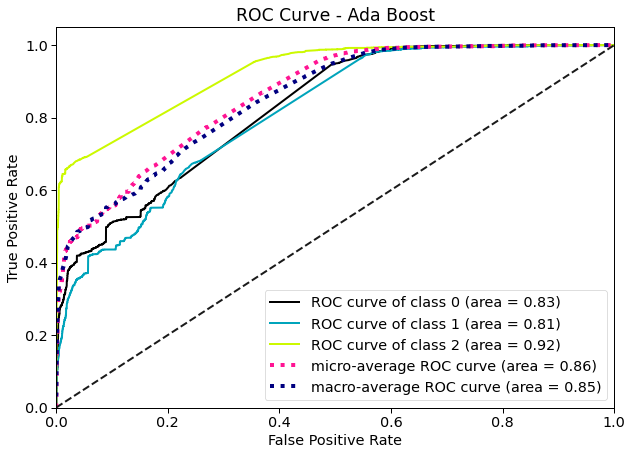

In [63]:
import scikitplot as skplt #to make things easy
sns.set_context("paper", font_scale=1.5)
y_pred_proba = gs3.predict_proba(X_test_log)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba,figsize=(10,7), title = 'ROC Curve - Ada Boost' )
plt.show();
#plt.savefig('ROC_Curve_RandomForest.jpeg');

## Model-4 Classifier: Multinomial Naive Bayes, Vectorizer: CountVectorizer

In [64]:
X = list(df_train['title'])
y = list(df_train['label'])

In [65]:
my_stopwords4 = set(['herself', 'forty', 'one', 'became', 'whereafter', 'mill', 'ever', 'whole', 'please', 'never', 'therefore', 'two', 'somehow', 'take', 'again', 'give', 'interest', 'be', 'amount', 'sometime', 'is', 'elsewhere', 'four', 'cant', 'them', 'noone', 'done', 'its', 'been', 'thick', 'for', 'would', 'do', 'nobody', 'to', 'what', 'system', 'whereupon', 'within', 'hundred', 'they', 'already', 'by', 'few', 'therein', 'thin', 'alone', 'beforehand', 'wherein', 'anyone', 'thereafter', 'of', 'move', 'whereby', 'where', 'once', 'that', 'everything', 'seem', 'toward', 'out', 'who', 'whom', 'why', 'less', 'de', 'if', 'were', 'up', 'however', 'there', 'ourselves', 'above', 'except', 'then', 'nothing', 'thru', 'nine', 'herein', 'nowhere', 'inc', 'together', 'perhaps', 'such', 'yourself', 'describe', 'further', 'serious', 'call', 'ten', 'under', 'down', 'cannot', 'my', 'might', 'empty', 'throughout', 'with', 'am', 'each', 'co', 'wherever', 'keep', 'around', 'thus', 'else', 'very', 'cry', 'about', 'any', 'indeed', 'much', 'latter', 'on', 'always', 'while', 'because', 'three', 'in', 'over', 'detail', 'whence', 'yourselves', 'whenever', 'enough', 'until', 'formerly', 'bottom', 'well', 'ours', 'have', 'himself', 'ie', 'anywhere', 'during', 'via', 'ltd', 'myself', 'afterwards', 'almost', 'hereafter', 'next', 'all', 'we', 'mostly', 'many', 'mine', 'nevertheless', 'this', 'these', 'top', 'before', 'most', 'couldnt', 'hasnt', 'a', 'his', 'below', 'back', 'meanwhile', 'can', 'made', 'per', 'fire', 'first', 'after', 'him', 'front', 'here', 'at', 'whereas', 'no', 'than', 'off', 'amoungst', 'otherwise', 'namely', 'last', 'other', 'against', 'as', 'your', 'show', 'becomes', 'least', 'twenty', 'was', 'should', 'or', 'former', 'whether', 'will', 'but', 'un', 'our', 'those', 'us', 'some', 'thence', 'nor', 'five', 'more', 'still', 'has', 'whither', 'moreover', 'you', 'when', 'besides', 'third', 'part', 'being', 'too', 'he', 'latterly', 'twelve', 'anyhow', 'may', 'me', 'now', 'name', 'hers', 'someone', 'though', 'none', 'since', 'also', 'fifty', 'are', 'into', 'through', 'their', 'either', 'neither', 'everyone', 'must', 're', 'becoming', 'beside', 'itself', 'go', 'eleven', 'upon', 'rather', 'bill', 'sincere', 'along', 'beyond', 'see', 'side', 'could', 'only', 'sometimes', 'both', 'although', 'thereby', 'fifteen', 'often', 'from', 'thereupon', 'she', 'behind', 'fill', 'eight', 'seems', 'it', 'the', 'how', 'others', 'yours', 'amongst', 'con', 'which', 'full', 'and', 'i', 'put', 'towards', 'even', 'whose', 'seemed', 'anything', 'without', 'onto', 'whatever', 'something', 'whoever', 'become', 'among', 'eg', 'had', 'everywhere', 'hereupon', 'found', 'somewhere', 'so', 'an', 'etc', 'between', 'every', 'same', 'seeming', 'across', 'six', 'anyway', 'due', 'get', 'several', 'themselves', 'another', 'hence', 'hereby', 'sixty', 'find', 'own', 'her', 'yet', 'not','food','made','like','de','make','good','one','https','looks','first','delicious','know','com','con','add','making','use','best','would','get','also','try','cooking','really','dish','much','great','thanks','think','find','recipes','thank','cook','style','new','used','home','www','need','anyone','well','love','red','green','want','en','go','int64','la','white','like','make','recipe','just','looks','making','sauce','make','https','just','looks','good','add','don','amp','removed','time','ve'])

In [66]:
# Split the data into the training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.40,
                                                    stratify=y,
                                                    random_state=42)

In [67]:
pipe4 = Pipeline([
    ('cvec4', CountVectorizer()),
    ('nb4',MultinomialNB(alpha=0.75))
])


pipe_params4 = {
    'cvec4__max_features' : [1400],
    #'cvec4__min_df': [3],
    'cvec4__max_df': [0.5,0.6],
    'cvec4__ngram_range' : [(1,1),(1,2)], ## maximum and minimum 1gram
    'cvec4__stop_words' : [my_stopwords4],

}

# Instantiate GridSearchCV.

gs4 = GridSearchCV(pipe4,param_grid=pipe_params4,cv=5,verbose=1,n_jobs=-1) # Uses all cores

gs4 = gs4.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.2s finished


In [68]:
cross_val_score(gs4,X_train,y_train).mean()

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.2s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.3s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.0s finished


0.7561111111111112

In [69]:
gs4.score(X_train, y_train)

0.7816666666666666

In [70]:
gs4.score(X_test,y_test)

0.7644791666666667

**Recreate MultinomialNB Classification using best parameters from above for feature importance**

In [71]:
## Instantiate
mnb4 = MultinomialNB(alpha=0.75)

## Vectorize
cvec4 = CountVectorizer(max_features=1400,max_df=0.5,ngram_range=(1,1),stop_words=my_stopwords4)

## Sparse Matrix -> Dense Matrix (For Visual Ref)
df1 = pd.DataFrame(cvec4.fit_transform(X_train).toarray(),
                  columns=cvec4.get_feature_names())

## Transform
X_train_log = cvec4.fit_transform(X_train)
X_test_log = cvec4.transform(X_test)

In [72]:
cross_val_score(mnb4,X_train_log,y_train,cv=5).mean()

0.7575694444444444

In [73]:
##Fit
mnb4.fit(X_train_log,y_train)

MultinomialNB(alpha=0.75)

In [74]:
print(mnb4.score(X_train_log,y_train))
print(mnb4.score(X_test_log,y_test))

0.7816666666666666
0.7644791666666667


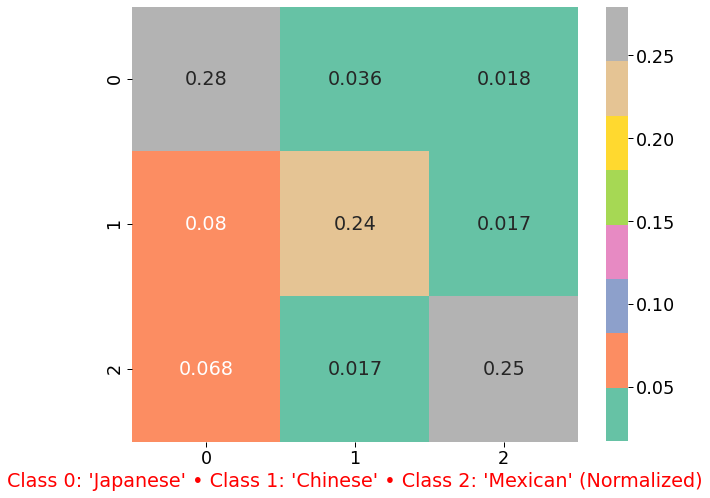

In [75]:
ypred4 = mnb4.predict(X_test_log)
result4 = pd.DataFrame(ypred4, columns=['Pred'])
result4['y_test'] = y_test
cf4 = confusion_matrix(y_test,ypred4)
plt.figure(figsize=(10,8))
sns.set_context("paper", font_scale=2.0) 
sns.heatmap(cf4/np.sum(cf4),annot=True, cmap='Set2')
plt.xlabel("Class 0: 'Japanese' • Class 1: 'Chinese' • Class 2: 'Mexican' (Normalized)", c='red');
plt.savefig('Heatmap_MultinomialNB.jpeg')

## The Diagonal tells me that over 75% of the classes have been classified correctly. 

In [76]:
## Classification Report
print(classification_report(y_test,ypred4))



              precision    recall  f1-score   support

           0       0.65      0.84      0.73      3200
           1       0.82      0.71      0.76      3200
           2       0.88      0.75      0.81      3200

    accuracy                           0.76      9600
   macro avg       0.78      0.76      0.77      9600
weighted avg       0.78      0.76      0.77      9600



In [77]:
### Calculate AUC (Area Under Curve) - using 'ovo' and 'ovr'

y_prob = mnb4.predict_proba(X_test_log)

## One Vs One - ovo
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")  ##Unweighted Average
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted") ## Weighted Average

## One Vs Rest - ovr
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

## Scores are similar because classes were balanced
## Classes are less separated compared to Logistic Regression

One-vs-One ROC AUC scores:
0.927558 (macro),
0.927558 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.927558 (macro),
0.927558 (weighted by prevalence)


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


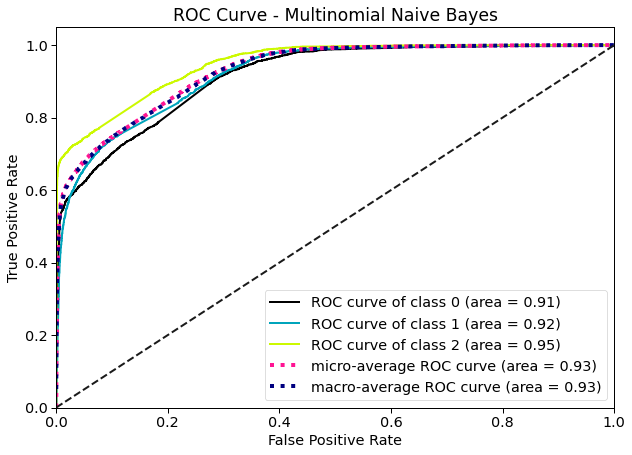

<Figure size 432x288 with 0 Axes>

In [78]:
import scikitplot as skplt #to make things easy
sns.set_context("paper", font_scale=1.5)
y_pred_proba = mnb4.predict_proba(X_test_log)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba,figsize=(10,7), title = 'ROC Curve - Multinomial Naive Bayes' )
plt.show();
plt.savefig('ROC_Curve_MultinomialNB.jpeg');

[Reference for below code - Sai Sandeep/Stack Overflow][1] and
[Reference tuple -> dict geeksforgeeks][2]

[1]: "https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers"
[2]: "https://www.geeksforgeeks.org/python-convert-list-tuples-dictionary/"

In [79]:
def nb_features(vectorizer, classifier, n=20, class_labels=[0,1,2]):
    
    # Get Features from vectorizer
    feature_names = vectorizer.get_feature_names()
    
    # Get log-probability from Classifier
    ## Returns list ot tuples - (log_Prob,Feature) plus sort in descending order
    top_class0 = sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:n]
    top_class1 = sorted(zip(classifier.feature_log_prob_[1], feature_names), reverse=True)[:n]
    top_class2 = sorted(zip(classifier.feature_log_prob_[2], feature_names), reverse=True)[:n]
    
    class0=dict()
    for prob,feature in top_class0:
        class0.setdefault(feature, []).append(round(np.exp(prob),2))
    
    class1=dict()
    for prob,feature in top_class1:
        class1.setdefault(feature, []).append(round(np.exp(prob),2))

    class2=dict()
    for prob,feature in top_class2:
        class2.setdefault(feature, []).append(round(np.exp(prob),2))
     
    return class0,class1,class2

In [80]:
class0, class1, class2 = nb_features(cvec4, mnb4)

In [81]:
class0 = pd.DataFrame(class0).T.reset_index()
class0.columns = ['Jap_words','ProbJ']
class0['    ']='    '

class1 = pd.DataFrame(class1).T.reset_index()
class1.columns = ['Chi_words','ProbC']
class1['    ']='    '

class2 = pd.DataFrame(class2).T.reset_index()
class2.columns = ['Mex_words','ProbM']
class1['    ']='    '

top_words = pd.concat([class0,class1,class2],axis=1)

In [82]:
top_words.to_csv('Compare_topwords.csv',index=False)

In [83]:
top_words

,Jap_words,ProbJ,,Chi_words,ProbC,,Mex_words,ProbM
0,japanese,0.03,,chinese,0.03,,mexican,0.03
1,rice,0.01,,fried,0.01,,tacos,0.02
2,ramen,0.01,,rice,0.01,,salsa,0.01
3,curry,0.01,,pork,0.01,,tortillas,0.01
4,japan,0.01,,chicken,0.01,,mexico,0.01
5,homemade,0.01,,noodles,0.01,,corn,0.01
6,sushi,0.01,,oil,0.01,,beans,0.01
7,chicken,0.01,,homemade,0.01,,taco,0.01
8,miso,0.01,,soup,0.01,,chile,0.01
9,salmon,0.01,,egg,0.01,,chicken,0.01


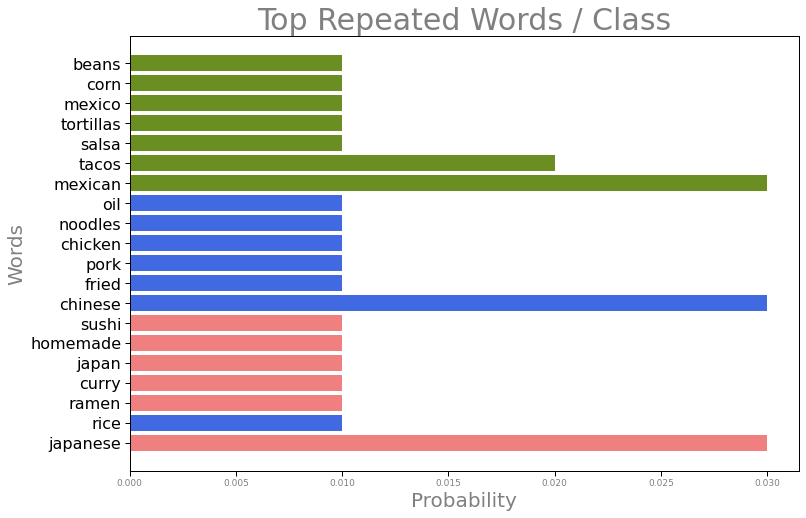

In [84]:
fig = plt.subplots(figsize =(12, 8))
plt.barh(top_words['Jap_words'][:7], top_words['ProbJ'][:7], color='lightcoral')
plt.barh(top_words['Chi_words'][:7], top_words['ProbC'][:7], color='royalblue')
plt.barh(top_words['Mex_words'][:7], top_words['ProbM'][:7], color='olivedrab')
plt.title('Top Repeated Words / Class', fontsize=30, color='grey')
plt.xlabel('Probability', fontsize=20, color='grey')
plt.ylabel('Words', fontsize=20, color='grey')
plt.yticks(size=16)
plt.xticks(size=9, color='grey')
plt.savefig('Top_Repeated_Words_Bar.jpeg');

## Model-5 Classifier: SVM (Support Vector Clssifier), Vectorizer: CountVectorizer

In [85]:
X = list(df_train['title'])
y = list(df_train['label'])

In [86]:
# Split the data into the training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.40,
                                                    stratify=y,
                                                    random_state=42)

In [87]:
pipe5 = Pipeline([
    ('cvec5', CountVectorizer()),
    ('svc',SVC(random_state=42, probability=True))
])


pipe_params5 = {
    'cvec5__max_features' : [1100],
    'cvec5__min_df': [4],
    'cvec5__max_df': [0.5],
    'cvec5__ngram_range' : [(1,1)], ## maximum and minimum 1gram
    'cvec5__stop_words' : [my_stopwords4],
    #'rfc__max_depth': [20,40],
    #'rfc__n_estimators': [10]
   'svc__kernel': ['sigmoid'],

  #  'svc__C':[10]
}

# Instantiate GridSearchCV.

gs5 = GridSearchCV(pipe5,param_grid=pipe_params5,cv=5,verbose=1,n_jobs=-1) # Uses all cores

gs5 = gs5.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


In [88]:
#cross_val_score(gs5,X_train,y_train).mean()

In [89]:
gs5.score(X_train,y_train)

0.7179861111111111

In [90]:
gs5.score(X_test,y_test)

0.7028125

**Sub Model using sklearns OVO/OVR classifiers**

In [91]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

In [92]:
svc= SVC(kernel='sigmoid',probability=True)
ovo = OneVsOneClassifier(svc)
ovo.fit(X_train_log,y_train)

OneVsOneClassifier(estimator=SVC(kernel='sigmoid', probability=True))

In [93]:
ovo.score(X_train_log,y_train)

0.7282638888888889

In [94]:
ovo.score(X_test_log,y_test)

0.7115625

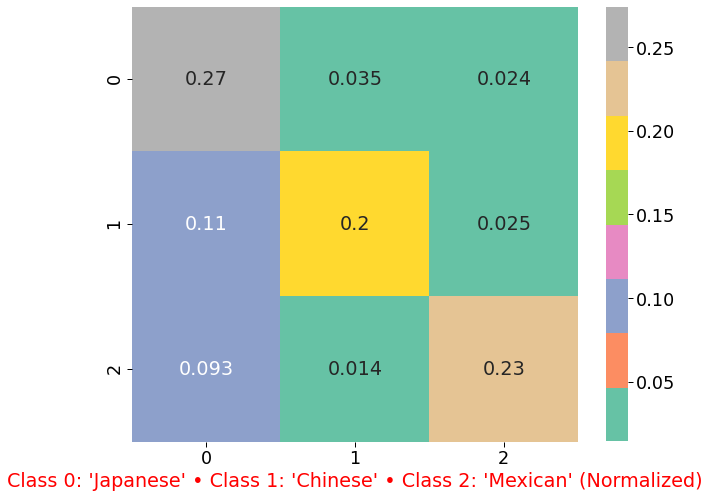

In [95]:
ypred5 = gs5.predict(X_test)
result5 = pd.DataFrame(ypred5, columns=['Pred'])
result5['y_test'] = y_test
cf5 = confusion_matrix(y_test,ypred5)
plt.figure(figsize=(10,8))
sns.set_context("paper", font_scale=2.0) 
sns.heatmap(cf5/np.sum(cf5),annot=True, cmap='Set2')
plt.xlabel("Class 0: 'Japanese' • Class 1: 'Chinese' • Class 2: 'Mexican' (Normalized)", c='red');
plt.savefig('Heatmap_SVM_ovo.jpeg')

## The Diagonal tells me that over 75% of the classes have been classified correctly. 

In [96]:
## Classification Report
print(classification_report(y_test,ypred5))



              precision    recall  f1-score   support

           0       0.58      0.82      0.68      3200
           1       0.81      0.61      0.69      3200
           2       0.82      0.68      0.74      3200

    accuracy                           0.70      9600
   macro avg       0.73      0.70      0.71      9600
weighted avg       0.73      0.70      0.71      9600



In [97]:
gs5.predict_proba

<function sklearn.model_selection._search.BaseSearchCV.predict_proba(self, X)>

In [98]:
### Calculate AUC (Area Under Curve) - using 'ovo' and 'ovr'

y_prob = gs5.predict_proba(X_test)

## One Vs One - ovo
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")  ##Unweighted Average
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted") ## Weighted Average

## One Vs Rest - ovr
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

## Scores are similar because classes were balanced
## Classes are less separated compared to Logistic Regression

One-vs-One ROC AUC scores:
0.872170 (macro),
0.872170 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.872170 (macro),
0.872170 (weighted by prevalence)


/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


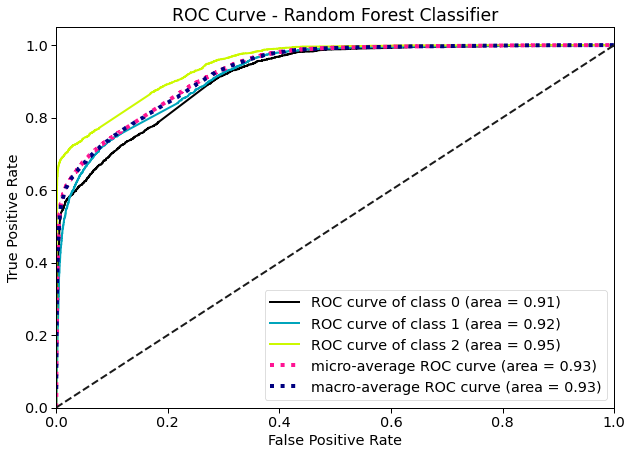

<Figure size 432x288 with 0 Axes>

In [99]:
import scikitplot as skplt #to make things easy
sns.set_context("paper", font_scale=1.5)
y_pred_proba = mnb4.predict_proba(X_test_log)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba,figsize=(10,7), title = 'ROC Curve - Random Forest Classifier' )
plt.show();
plt.savefig('ROC_Curve_SVC.jpeg');

## Comparing scores for all Models

**Multinomial-NB**
+ Even though the results obtained using Logistic Regression are more accurate, they show higher variance compared to other models, and SVC and Random Forest show consistent results, I would select MultinomialNB as the best estimator due to high accuracy. Model is a little overfit, but is acceptable considering lower false-negatives and false-positives obtained using OVR method.

| Estimator     | Vectorizer | Cross-Val Score (mean) | Train Accuracy | Test Accuracy | Area under ROC curve<br> (macro-average) |
|---------------|------------|------------------------|----------------|---------------|------------------------------------------|
| Logistic      | Tfidf      | 0.756                  | 0.803          | 0.762         | 0.93                                     |
| Random Forest | Count      | 0.694                  | 0.719          | 0.711         | 0.90                                     |
| Ada Boost     | Count      | 0.615                  | 0.768          | 0.734         | 0.85                                     |
| MultinomialNB | Count      | 0.756                  | 0.782          | 0.764         | 0.93                                     |
| SVC           | Count      | 0.701                  | 0.718          | 0.703         | 0.93                                     

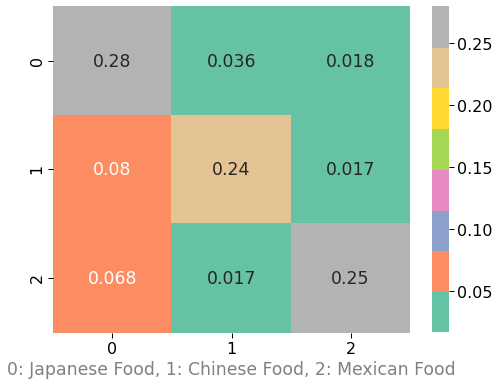

In [100]:
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.8) 
sns.heatmap(cf4/np.sum(cf4),annot=True, cmap='Set2')
plt.xlabel('0: Japanese Food, 1: Chinese Food, 2: Mexican Food', color='grey');

## The Diagonal tells me that over 75% of the classes have been classified correctly. 

### TEST DATA using the same MultinomialNB model

In [101]:
# Split the data into the training and testing sets.
X = list(df_test['title'])
y = list(df_test['label'])

In [102]:
final_pred = gs4.predict(X)

In [103]:
pd.DataFrame([y,final_pred]).T.rename(columns={0:'Actual',1:'Predicted'})[2000:2250]

,Actual,Predicted


## Insights

**Based on my models, I found following keywords to be used the most among all 3 subreddits**

+ These words definitely makes sense like Japanese Cuisine has the word 'ramen' appear very frequently compared to 'noodles' for Chinese Cuisine.
+ Among Japanese food, Rice, Ramen and Sushi tops the list, for Chinese, Rice, Pork, Chicken and Noodles comprise of the top few, while for Mexican food, Tacos, Salsa, Tortillas and Corn keywords are talked about more frequently.
+ Certain items like homemade, Rice, Chicken and Eggs are consistenly used amoung all cuisines.
+ To add, SEO can use certain Japanese keywords like 'udon', 'okonomiyaki','katsu', Chinese keywords like 'sinchuan' or Mexican words like 'quesso', 'chiles', 'carne' on their online menu to increase their rankings.

In [104]:
top_words

,Jap_words,ProbJ,,Chi_words,ProbC,,Mex_words,ProbM
0,japanese,0.03,,chinese,0.03,,mexican,0.03
1,rice,0.01,,fried,0.01,,tacos,0.02
2,ramen,0.01,,rice,0.01,,salsa,0.01
3,curry,0.01,,pork,0.01,,tortillas,0.01
4,japan,0.01,,chicken,0.01,,mexico,0.01
5,homemade,0.01,,noodles,0.01,,corn,0.01
6,sushi,0.01,,oil,0.01,,beans,0.01
7,chicken,0.01,,homemade,0.01,,taco,0.01
8,miso,0.01,,soup,0.01,,chile,0.01
9,salmon,0.01,,egg,0.01,,chicken,0.01


## Scope of this project

+ This model could further be expanded across more cuisines and diverse data can be collected from multiple platforms to increase models accuracy.

In [105]:
### End ###